## Flights Dataset
### By Alhanoof Alnajashi

### Investigation Overview

> The goal of this presentation is to show the correlation in delays in some days and other factors by knowing some characteristics of the flights.

### Dataset Overview

> The data set contain 60941 entries and it is consists of the flight information the day, date, destination, and origin airports and city.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
Flight_clean = pd.read_csv('Flight_clean.csv')

## Number of flights in January by days.
> This visualization showing the highest days in the month that are been chosen by the customers which are 7 and the days in the end of the month.

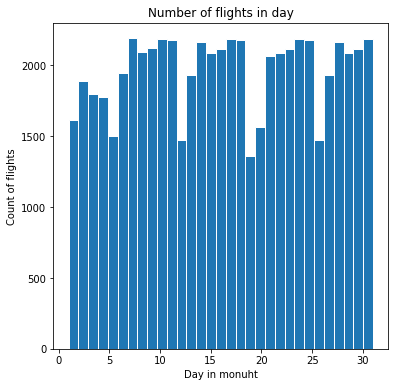

In [3]:
#correlation between days and number of flights
plt.figure(figsize = (6,6))
plt.hist(data = Flight_clean, x = 'DAY_OF_MONTH' , bins = 31 , edgecolor = 'white')
plt.title('Number of flights in day')
plt.xlabel('Day in monuht')
plt.ylabel('Count of flights');

## Top 3 cities in destination
>New York city gets almost 85% to a destination city in Jan-2019.

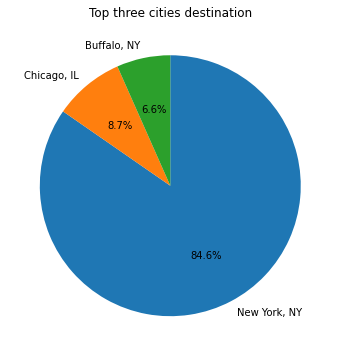

In [4]:
#get the top 3 cities by taking a sub of the data [0:3]
plt.figure(figsize = (6,6))
sorted_counts = Flight_clean['DEST_CITY_NAME'].value_counts()[0:3]
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,autopct='%1.1f%%', counterclock = False)
plt.title('Top three cities destination');

## The days in month/week correlation

>Since we know the most days in the month that reserve by customers, let's discover the relation between the number of days in a week and in a month.
>The fourth and fifth days in the week are most reserve, and from the middle of the month as well as that explains the number of flights we get it in univariate exploration.  

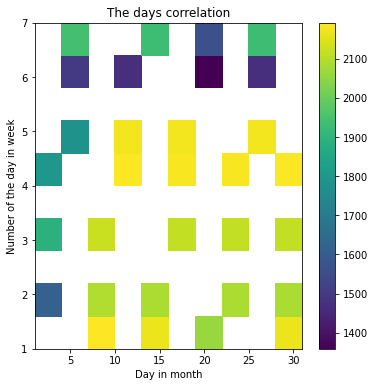

In [5]:
#get frequncy between the day in week and day in month for flights.
plt.figure(figsize = (6,6))
plt.hist2d(data = Flight_clean , x='DAY_OF_MONTH' , y='DAY_OF_WEEK' , cmin=0.5)
plt.colorbar()
plt.xlabel('Day in month')
plt.ylabel('Number of the day in week')
plt.title('The days correlation');

## Minutes of delay in days week by weather

>By getting to know the best days in a week for flights, let's discover some problems that may affect these flights, by getting to know the delays caused by the weather.
>Delay caused by weather almost every day by 100 to 200 minutes which is 1 hour to 2 hours and a half delays, and it sometimes getting more height in the first, third, and fourth days in a week.

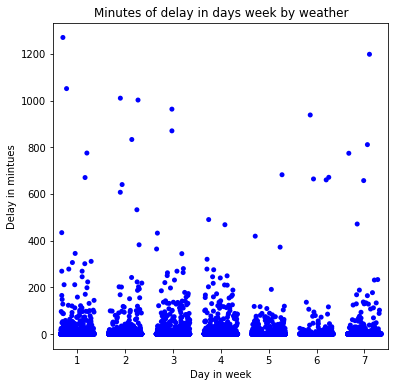

In [6]:
#delay coused by weather
plt.figure(figsize = (6,6))
#jitter used to specify the overlapping that may happen and make the visualization more clear. 
sb.stripplot(data = Flight_clean, x = 'DAY_OF_WEEK', y = 'WEATHER_DELAY' , jitter = 0.35 , color = 'blue')
plt.xlabel('Day in week')
plt.ylabel('Delay in mintues')
plt.title('Minutes of delay in days week by weather');

## Correlation between top five city destination and day of month based arrival delay

>Let focus on arrival delays for the top five cities in each day of the month, to get in which day the delays are getting higher.
>Chicago has the highest delay in arrival on day 28 of the month, also on day 19.

<Figure size 432x432 with 0 Axes>

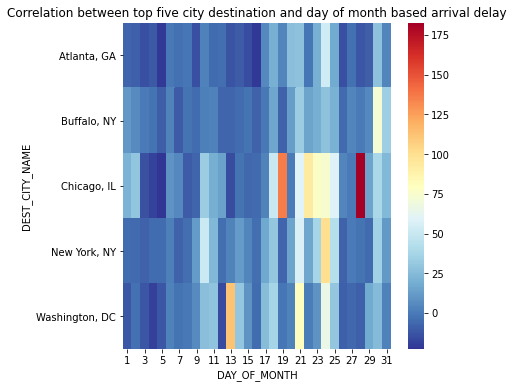

In [7]:
plt.figure(figsize = (6,6))
#Top 5 destination cities
top_cities = Flight_clean['DEST_CITY_NAME'].value_counts()[0:5].index
#Create dataframe for top 5 cities 
top_cities = Flight_clean[Flight_clean.DEST_CITY_NAME.isin(top_cities)]
#delay in arrival by top five city destination and day of month
plt.figure(figsize = (6,6))
ct_counts = top_cities.groupby(['DEST_CITY_NAME', 'DAY_OF_MONTH']).ARR_DELAY.mean()
ct_counts = ct_counts.reset_index(name='Arrival Delay')
ct_counts = ct_counts.pivot(index = 'DEST_CITY_NAME', columns = 'DAY_OF_MONTH', values = 'Arrival Delay')
sb.heatmap(ct_counts , cmap = "RdYlBu_r")
plt.yticks(rotation = 0)
plt.title('Correlation between top five city destination and day of month based arrival delay');

## Correlation between the weather , carrier , and arrival delays

>The main thing that wants to be explored here is how to get the correlation between the three types of delays and discover more in some other variables that may affect the analysis.
>I get here the main insights that any delays in weather or carrier delays will affect in the arrival time so it consider also as delays in arrivals and it gets increasing.

<Figure size 432x432 with 0 Axes>

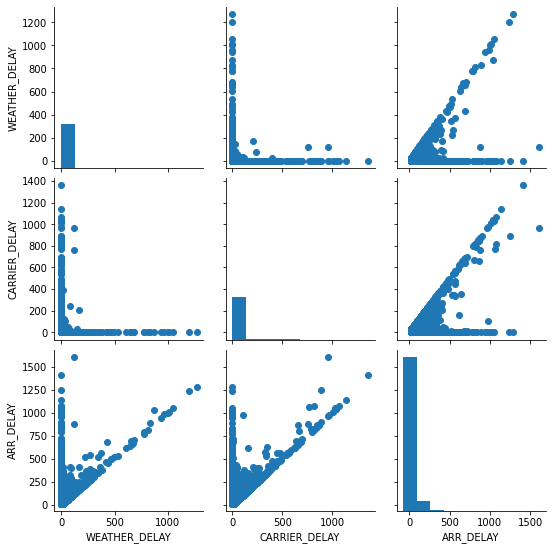

In [8]:
#get the correlation between the weather , carrier , and arrival delays
plt.figure(figsize = (6,6))
g = sb.PairGrid(data = Flight_clean, vars = ['WEATHER_DELAY', 'CARRIER_DELAY', 'ARR_DELAY'])
g.map_diag(plt.hist);
g.map_offdiag(plt.scatter);

In [ ]:
!jupyter nbconvert Flight_slide_deck.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook Flight_slide_deck.ipynb to slides
[NbConvertApp] Writing 424496 bytes to Flight_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Flight_slide_deck.slides.html
Use Control-C to stop this server
